In [1]:
#matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation
plt.rc("figure", figsize=[8,5])
plt.rc("font", size=8)
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
plt.ioff()

import numpy as np
from math import pi, sqrt
import KSP_module as ksp
from KSP_module import Kerbol, Kerbin, Duna, Eve, Mun, Minmus, Moho

KSP module loaded
All tests passed


# Calculate Hohmann transfer orbits from Kerbin (Earth analog) to Duna (Mars analog)

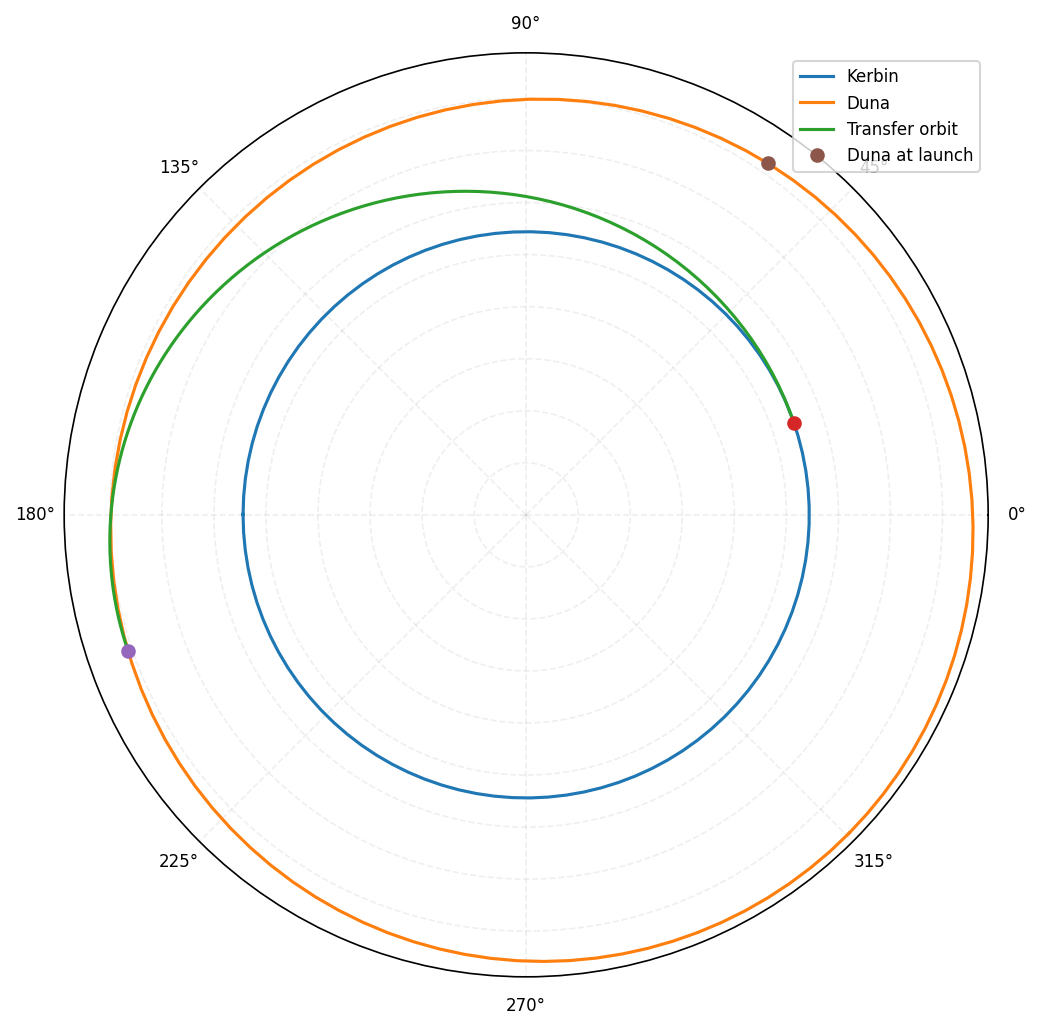

['Y1 D236 03:06:18', np.float64(5087177.890796991)]


In [2]:
transfer1 = ksp.calc_window(Kerbin.orbit, Duna.orbit, 0)
fig,ax = ksp.plot_hohmann_orbit(Kerbin, Duna, transfer1)
plt.show()
print([ksp.pretty_date(transfer1.t_launch), transfer1.t_launch])

# Hohmann transfer orbit from Kerbin (Earth analog) to Eve (Venus analog)

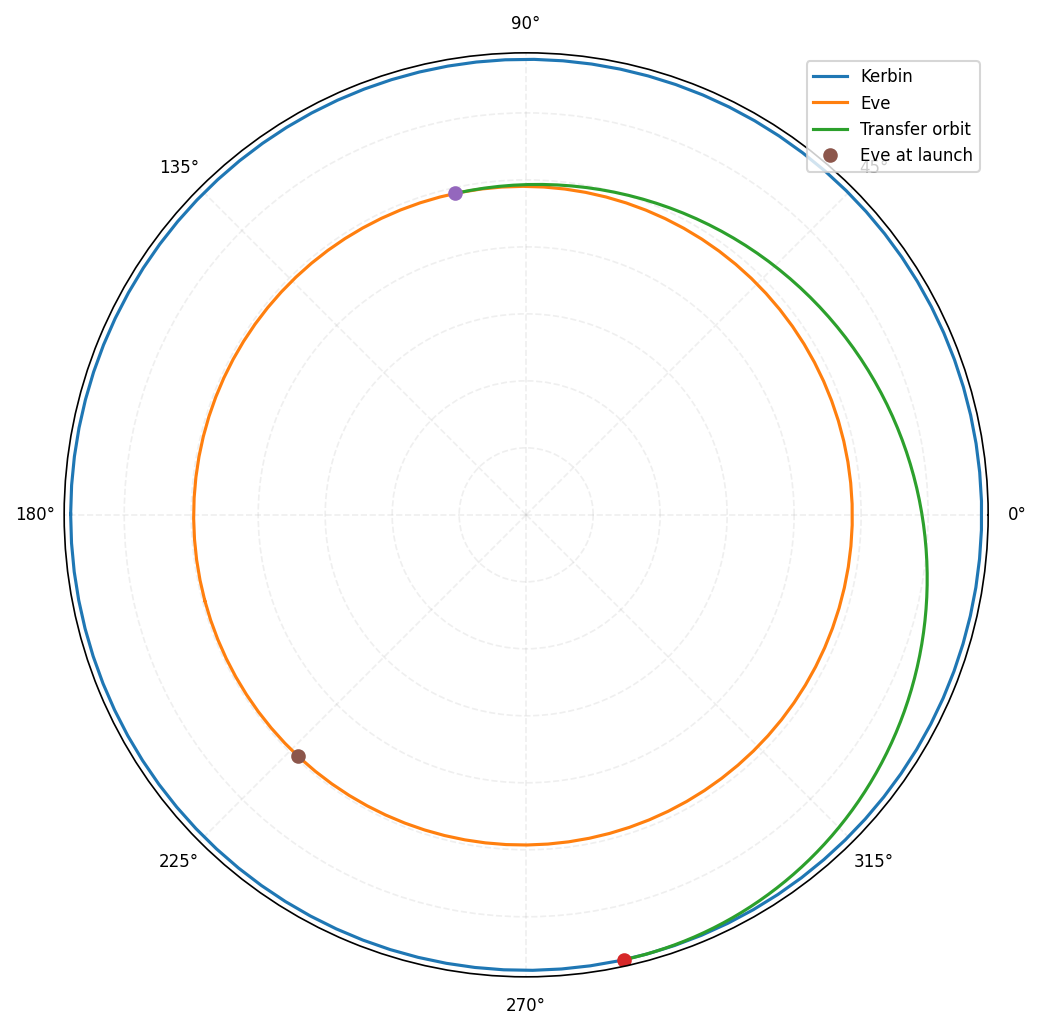

['Y2 D122 01:54:17', np.float64(11824001.267835751)]


In [3]:
transfer2 = ksp.calc_window(Kerbin.orbit, Eve.orbit, 0)
fig,ax = ksp.plot_hohmann_orbit(Kerbin, Eve, transfer2)
plt.show()
print([ksp.pretty_date(transfer2.t_launch), transfer2.t_launch])


# Animated Hohmann transfer orbit from low Kerbin orbit (100 m above top of atmosphere) to Mun (Luna analog)

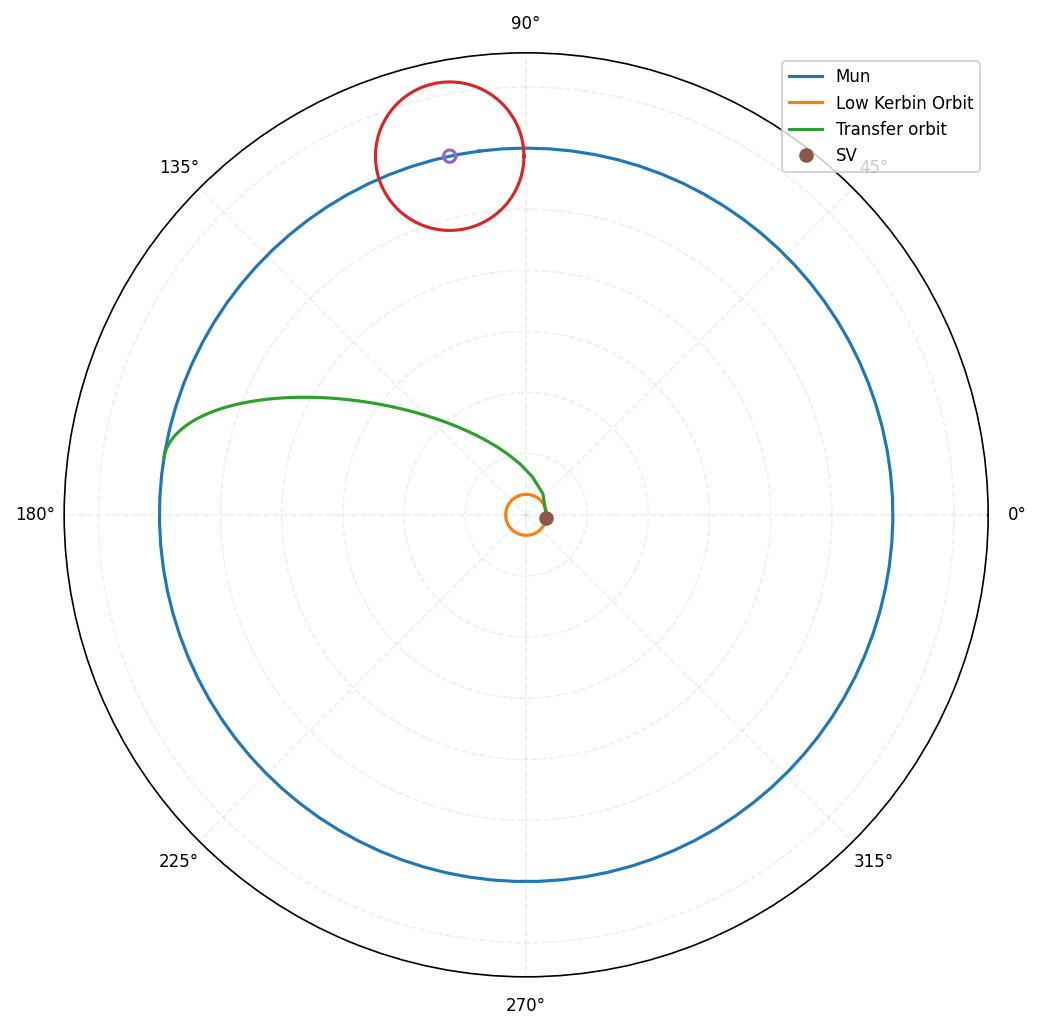

In [4]:
LKO = ksp.orbit(Kerbin, min_alt = 70000.1, e=0)
transfer3 = ksp.calc_window(LKO, Mun.orbit, 0)
t_soi = transfer3.calc_soi_change(0)[0]
fig,ax = ksp.plot_hohmann_orbit(LKO, Mun, transfer3)

n_frames = 36
frame_times = np.linspace(transfer3.t_launch, t_soi, n_frames)

def animate(t, ax):
    ax.cla()
    ax = ksp.add_planetary_orbit_to_plot(ax, Mun)
    ax = ksp.add_orbit_to_plot(ax, LKO, "Low Kerbin Orbit")
    ax = ksp.add_orbit_to_plot(ax, transfer3, "Transfer orbit")
    ax = ksp.add_soi_to_plot(ax, Mun, t)
    ax = ksp.add_planetary_body_to_plot(ax, Mun, t, label=None)
    ax = ksp.add_orbit_point_to_plot(ax, transfer3, t, label="SV")
    ax.set_yticklabels([])  # Hide radial labels

matplotlib.animation.FuncAnimation(fig, animate, frames=frame_times, fargs=(ax,))

# First 5 launch windows from Kerbin (Earth analog) to Moho (Mercury analog)

In [5]:
t0 = 0
for i in range(5):
    transfer = ksp.calc_window(Kerbin.orbit, Moho.orbit, t0)
    dv = ksp.calc_hohmann_dv(transfer, LKO)
    min_dist = transfer.calc_distance_to(Moho, transfer.t_arrival)
    print(f'Time of launch: {ksp.pretty_date(transfer.t_launch)}')
    print(f'Time of arrival: {ksp.pretty_date(transfer.t_arrival)}')
    print(f"Minimum distance to Moho at arrival: {min_dist/1e6:.2f} M km")
    print(f"Delta-v needed for transfer from LKO to Moho: {dv:.2f} m/s")
    print('-------------------')
    t0 = transfer.t_launch + 1000
    print(t0)

Time of launch: Y1 D45 04:36:39
Time of arrival: Y1 D159 01:04:16
Minimum distance to Moho at arrival: 318.75 M km
Delta-v needed for transfer from LKO to Moho: 9333.40 m/s
-------------------
967999.3897797851
Time of launch: Y1 D158 05:15:29
Time of arrival: Y1 D285 00:16:31
Minimum distance to Moho at arrival: 496.02 M km
Delta-v needed for transfer from LKO to Moho: 6307.98 m/s
-------------------
3411129.400033464
Time of launch: Y1 D311 05:35:60
Time of arrival: Y2 D10 05:25:16
Minimum distance to Moho at arrival: 662.23 M km
Delta-v needed for transfer from LKO to Moho: 6519.81 m/s
-------------------
6717159.885755491
Time of launch: Y2 D27 03:27:45
Time of arrival: Y2 D140 03:06:01
Minimum distance to Moho at arrival: 195.87 M km
Delta-v needed for transfer from LKO to Moho: 9475.73 m/s
-------------------
9778609.432244334
Time of launch: Y2 D141 01:38:07
Time of arrival: Y2 D264 03:56:59
Minimum distance to Moho at arrival: 568.96 M km
Delta-v needed for transfer from LKO to